#Loading dataset from kaggle

In [1]:
from google.colab import files
files.upload()  # Upload 'kaggle.json' here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wajeekhan","key":"4d7320cb0a829b122e8cffeb4ede1ab5"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 83% 50.0M/60.3M [00:00<00:00, 153MB/s]
100% 60.3M/60.3M [00:00<00:00, 158MB/s]


In [4]:
!unzip fer2013.zip -d /content/dataset


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/train/sad/Training_65242339.jpg  
  inflating: /content/dataset/train/sad/Training_65267116.jpg  
  inflating: /content/dataset/train/sad/Training_65275626.jpg  
  inflating: /content/dataset/train/sad/Training_6529266.jpg  
  inflating: /content/dataset/train/sad/Training_65329617.jpg  
  inflating: /content/dataset/train/sad/Training_65338712.jpg  
  inflating: /content/dataset/train/sad/Training_65338797.jpg  
  inflating: /content/dataset/train/sad/Training_65387162.jpg  
  inflating: /content/dataset/train/sad/Training_65404494.jpg  
  inflating: /content/dataset/train/sad/Training_65426218.jpg  
  inflating: /content/dataset/train/sad/Training_65430136.jpg  
  inflating: /content/dataset/train/sad/Training_65437377.jpg  
  inflating: /content/dataset/train/sad/Training_6545735.jpg  
  inflating: /content/dataset/train/sad/Training_65463385.jpg  
  inflating: /content/dataset/train/sad/Training_654739

#Libraries

In [208]:
 # Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

from torch.optim.lr_scheduler import StepLR

#importing a dataloader
from torch.utils.data import DataLoader

import numpy as np

###Setting device

In [159]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

##Writing the transformations to apply

In [160]:
#writing all the transformation i want to apply on my dataset


transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale (1 channel)
    transforms.RandomHorizontalFlip(p=0.5),  # Randomly flip images horizontally
    transforms.RandomRotation(degrees=10),  # Randomly rotate images by 20 degrees
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.5], std=[0.5])
])

##Loading the dataset now

In [161]:
# Load training data
train_data = datasets.ImageFolder(root='/content/dataset/train', transform=transform)

# Load testing data
test_data = datasets.ImageFolder(root='/content/dataset/test', transform=transform)

###Exploring the dataset

In [162]:
img,label=train_data[0]
img.shape,label

(torch.Size([1, 48, 48]), 0)

In [163]:
len(train_data),len(test_data)

(28709, 7178)

In [164]:
train_data.class_to_idx

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [165]:
class_names = train_data.classes

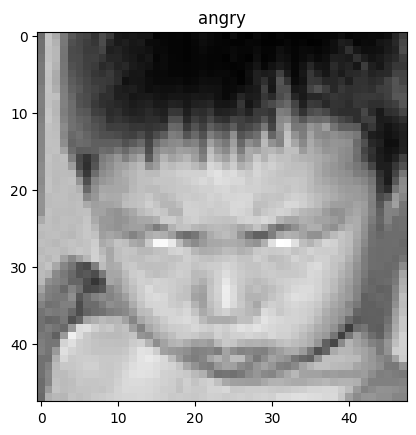

In [166]:
#visualizing our data
image, label = train_data[0]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

#preparing a dataloader

In [167]:
#prepare a dataloader
# Setup the batch size hyperparameter
BATCH_SIZE = 64

train_loader=DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_loader=DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)


In [168]:
#lets see how our data loader look like
# Let's check out what what we've created
print(f"DataLoaders: {train_loader, test_loader}")
print(f"Length of train_dataloader: {len(train_loader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_loader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c72903c0310>, <torch.utils.data.dataloader.DataLoader object at 0x7c72903c04c0>)
Length of train_dataloader: 449 batches of 64...
Length of test_dataloader: 113 batches of 64...


In [169]:
#let's see what is inside the dataloader
img_batch,label_batch=next(iter(train_loader))
img_batch.shape,label_batch.shape

(torch.Size([64, 1, 48, 48]), torch.Size([64]))

Text(0.5, 1.0, 'happy')

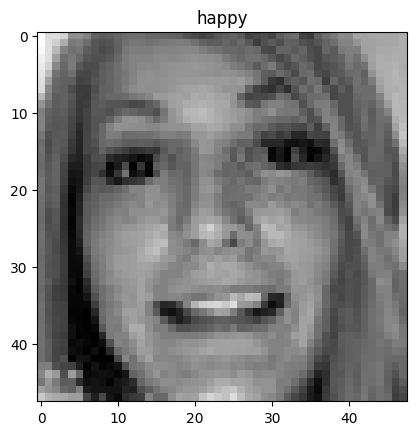

In [170]:
#let's see a random sample from our train loader
rand_index=torch.randint(0,len(img_batch),size=(1,))
img,label=img_batch[rand_index],label_batch[rand_index]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])

#Building a Model

In [171]:
torch.manual_seed(42)

In [227]:
output_shape=len(class_names)

In [196]:

model = nn.Sequential(
    # First Convolutional Block
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=0),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),



    # Second Convolutional Block
    nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=0),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),

    # third Convolutional BLock
    nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=0),
    nn.BatchNorm2d(512),
    nn.ReLU(),
    nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=3, stride=1, padding=0),
    nn.BatchNorm2d(1024),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),

    # Flatten and Fully Connected Layer
    nn.Flatten(),

    nn.Linear(in_features=4096, out_features=256),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(in_features=256,out_features=128),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    nn.Dropout(0.5),



    nn.Linear(in_features=128, out_features=64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(in_features=64, out_features=output_shape)
)



In [199]:
model.to(device)

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): ReLU()
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (11): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU()
  (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (14): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (15): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (16): ReLU()
  (17): Conv2d(512, 

###important information about the dimension for classification phase

##setting the loss fn and optimizer

In [200]:
#loss and optimizer
#set up loss and optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model.parameters(),lr=0.001,weight_decay=1e-4)

scheduler = StepLR(optimizer, step_size=5, gamma=0.1)  # Reduce LR by 0.1 every 5 epochs


###Funtion to calculate accuracy

In [201]:
def calculate_accuracy(model, data_loader):
    model.eval()  # Set model to evaluation mode
    correct_predictions = 0
    total_predictions = 0

    with torch.inference_mode():  # Disable gradient computation
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)
            # Forward pass: Get the model's predictions
            outputs = model(images)

            # Get the predicted class by taking the class with the highest score
            _, predicted = torch.max(outputs, 1)

            # Count the total number of predictions
            total_predictions += labels.size(0)

            # Count the number of correct predictions
            correct_predictions += (predicted == labels).sum().item()

    # Calculate accuracy as the percentage of correct predictions
    accuracy = 100 * correct_predictions / total_predictions
    return accuracy


In [202]:

# Early stopping function
def early_stopping(test_loss, best_test_loss, patience_counter, patience):
    """
    Implements early stopping logic based on test loss.

    Parameters:
    - test_loss: Current test loss
    - best_test_loss: Best test loss so far
    - patience_counter: Counter for non-improving epochs
    - patience: How many epochs to wait before stopping

    Returns:
    - stop_training: Boolean indicating whether to stop training
    - best_test_loss: Updated best test loss
    - patience_counter: Updated patience counter
    """
    if test_loss < best_test_loss:
        best_test_loss = test_loss  # Update best test loss
        patience_counter = 0  # Reset patience counter
        stop_training = False
    else:
        patience_counter += 1  # Increment patience counter
        if patience_counter >= patience:
            stop_training = True  # Trigger early stopping
        else:
            stop_training = False

    return stop_training, best_test_loss, patience_counter


##Train and Test Loop

In [203]:
#train and test
#train and testing loop

best_test_loss = float('inf')
patience_counter = 0
patience = 3 # Number of epochs to wait for improvement before stopping
epochs=20

# Initialize lists to store losses
train_losses = []
test_losses = []


for epoch in range(epochs):
  #TRAIN
  train_loss = 0
  #set to train mode
  model.train()
  for train_images,train_labels in train_loader:
      train_images = train_images.to(device)  # Move images to GPU
      train_labels = train_labels.to(device)  # Move labels to GPU
      #forward pass
      train_pred = model(train_images)
      #calculate the loss
      loss=loss_fn(train_pred,train_labels)
      train_loss+=loss
      #zero grad
      optimizer.zero_grad()
      #backword propogation
      loss.backward()
      #step
      optimizer.step()
  # Divide total train loss by length of train dataloader
  train_loss /= len(train_loader)
  train_losses.append(train_loss)  # Store the training loss

  #TEST
  test_loss=0
  #set to test
  model.eval()
  with torch.inference_mode():
    for test_images,test_labels in test_loader:
        test_images=test_images.to(device)
        test_labels=test_labels.to(device)
        #pass
        test_pred=model(test_images)
        #loss
        loss=loss_fn(test_pred,test_labels)
        test_loss+=loss
    test_loss=test_loss/len(test_loader)
    test_losses.append(test_loss)  # Store the test loss
  test_accuracy = calculate_accuracy(model, test_loader)

  scheduler.step()

  # Call early stopping
  stop_training, best_test_loss, patience_counter = early_stopping(test_loss, best_test_loss, patience_counter, patience)

  print(f" Epoch#{epoch} Train loss: {train_loss:.5f} | Test loss: {test_loss:.5f}  Test Accuracy: {test_accuracy:.2f}%")

  if stop_training:
        print(f"Stopping early at epoch {epoch}")
        break


 Epoch#0 Train loss: 1.77388 | Test loss: 1.53288  Test Accuracy: 40.74%
 Epoch#1 Train loss: 1.46930 | Test loss: 1.37656  Test Accuracy: 47.28%
 Epoch#2 Train loss: 1.35153 | Test loss: 1.31739  Test Accuracy: 51.00%
 Epoch#3 Train loss: 1.30659 | Test loss: 1.23820  Test Accuracy: 53.19%
 Epoch#4 Train loss: 1.26831 | Test loss: 1.20313  Test Accuracy: 53.32%
 Epoch#5 Train loss: 1.18671 | Test loss: 1.12271  Test Accuracy: 57.36%
 Epoch#6 Train loss: 1.15208 | Test loss: 1.10277  Test Accuracy: 58.47%
 Epoch#7 Train loss: 1.12526 | Test loss: 1.08692  Test Accuracy: 58.55%
 Epoch#8 Train loss: 1.10687 | Test loss: 1.07753  Test Accuracy: 59.38%
 Epoch#9 Train loss: 1.08613 | Test loss: 1.07059  Test Accuracy: 58.87%
 Epoch#10 Train loss: 1.06384 | Test loss: 1.04749  Test Accuracy: 60.63%
 Epoch#11 Train loss: 1.04576 | Test loss: 1.04778  Test Accuracy: 60.21%
 Epoch#12 Train loss: 1.04555 | Test loss: 1.04163  Test Accuracy: 60.73%
 Epoch#13 Train loss: 1.04402 | Test loss: 1.042

#Making predictions

In [225]:
def make_predictions(model, test_loader, num_samples=9, device='cuda'):
    """
    Make predictions on random samples from the test set.

    Parameters:
    - model: The trained model
    - test_loader: The DataLoader for the test set
    - num_samples: Number of random samples to predict and display (default: 9)
    - device: The device to use ('cpu' or 'cuda')
    """
    model.eval()  # Set the model to evaluation mode
    model.to(device)  # Move the model to the correct device

    # Get random samples from the test set
    with torch.no_grad():  # Disable gradient computation
        plt.figure(figsize=(7, 7))  # Set the figure size for the grid

        for i in range(num_samples):
            idx = torch.randint(0, len(test_loader.dataset), (1,)).item()  # Randomly pick an index
            image, label = test_loader.dataset[idx]  # Get the sample

            # Move image and label to the correct device
            image = image.to(device)
            if isinstance(label, torch.Tensor):
                label = label.item()

            # Make prediction
            output = model(image.unsqueeze(0))  # Add batch dimension
            _, predicted = torch.max(output, 1)
            predicted = predicted.item()

            # Plot the image in a 3x3 grid
            plt.subplot(3, 3, i+1)  # Position (i+1) in a 3x3 grid
            plt.imshow(image.squeeze().cpu().numpy(), cmap="gray")
            plt.title(f"Actual: {label} | Pred: {predicted}", color="green" if label == predicted else "red")
            plt.axis('off')

        plt.tight_layout()  # Adjust layout so the images are spaced nicely
        plt.show()


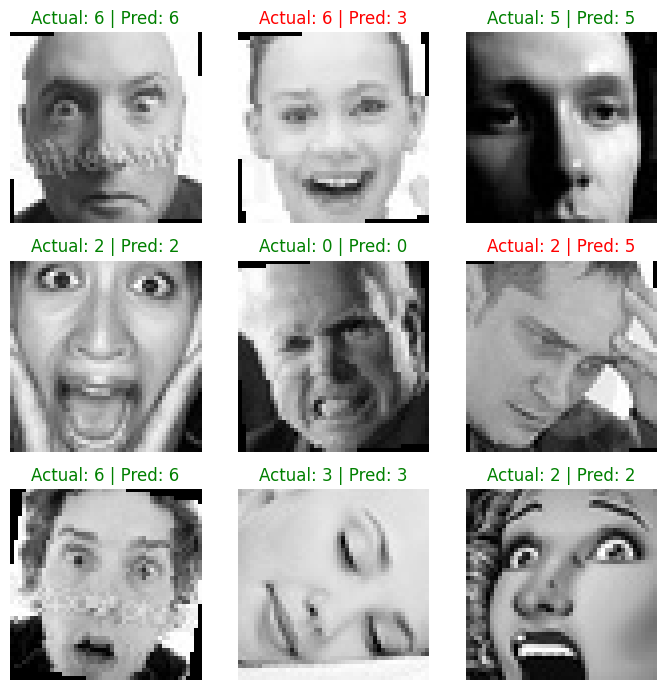

In [226]:
# After your training loop (before early stopping)
make_predictions(model, test_loader)

#Performance Metrics and Visualizations


In [214]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

def evaluate_and_visualize(model, test_loader, train_losses, test_losses, device):
    model.eval()  # Set the model to evaluation mode

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in test_loader:
            inputs, labels = batch
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            # Collect all predictions and true labels
            all_preds.extend(preds.cpu().numpy())  # Move tensors to CPU and convert to numpy
            all_labels.extend(labels.cpu().numpy())  # Move tensors to CPU and convert to numpy

    # Convert to numpy arrays for sklearn metrics
    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    # Calculate accuracy, precision, recall, F1-score
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')



    # Print metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")

    print("X--------------------------------------------------------------------------------------------------------X","\n")

    # Plot loss curves
    plt.figure(figsize=(8, 6))
    plt.plot(torch.tensor(train_losses).cpu().numpy(), label='Train Loss')  # Ensure losses are on CPU
    plt.plot(torch.tensor(test_losses).cpu().numpy(), label='Test Loss')  # Ensure losses are on CPU
    plt.title('Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    print("X--------------------------------------------------------------------------------------------------------X","\n")

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



Accuracy: 0.61
Precision: 0.59
Recall: 0.61
F1-Score: 0.59
X--------------------------------------------------------------------------------------------------------X 



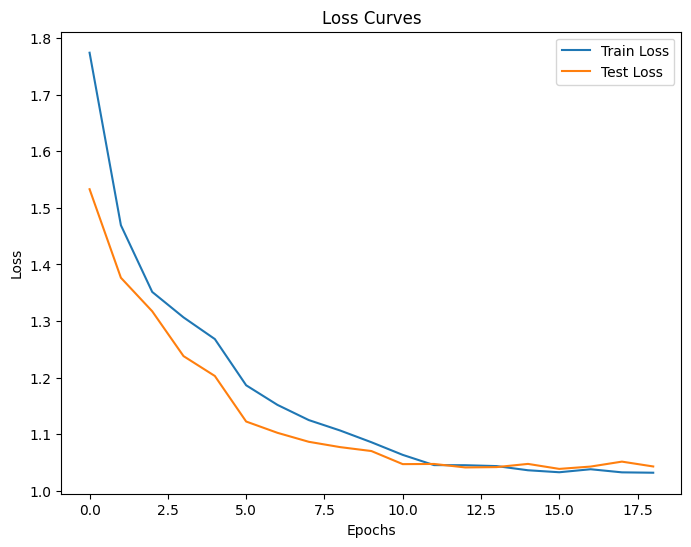

X--------------------------------------------------------------------------------------------------------X 



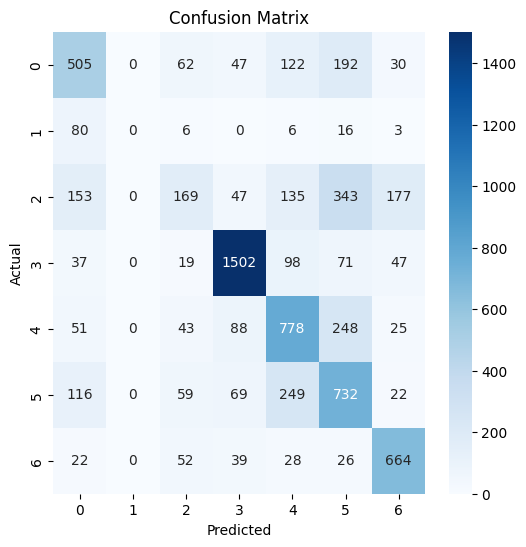

In [215]:
# After training and testing, call this single function to evaluate and visualize
evaluate_and_visualize(model, test_loader, train_losses, test_losses, device)